# ***World Happiness Report - Metrics***
---
In this notebook, we will evaluate the performance of the trained Machine Learning model using various evaluation metrics. 

This includes calculating metrics such as Mean Squared Error (MSE) and R-squared (R²) to assess the accuracy and effectiveness of the model's predictions. Additionally, we will visualize the model's performance comparing the predicted results with the original values.

## **Setting the notebook**

First we will adjust the directory of our project in order to correctly detect the packages and modules that we are going to use.

In [1]:
import os

try:
    os.chdir("../../etl-workshop-3")
except FileNotFoundError:
    print("You are already in the correct directory.")

We proceed to import the following for this notebook:

### **Dependencies**

* **Pandas** ➜ Used for data manipulation and analysis.

* **Matplotlib** ➜ Used for creating static, animated, and interactive visualizations in Python.

* **Seaborn** ➜ Used for statistical data visualization; provides a high-level interface for drawing attractive and informative statistical graphics.

* **scikit-learn** ➜ Used for machine learning, providing simple and efficient tools for data analysis.

    * *metrics.mean_squared_error* ➜ Calculates the mean squared error, a metric to evaluate the quality of predictions.

    * *metrics.r2_score* ➜ Calculates the R² coefficient of determination to measure model fit.

### **Modules**

* **src.database.db_operations** ➜ This module handles database operations, including creating and disposing of database connections and loading cleaned data into tables.

    * *creating_engine* ➜ Creates a SQLAlchemy engine to connect to a PostgreSQL database using environment variables. If the database does not exist, it creates it.

    * *disposing_engine* ➜ Disposes of the provided SQLAlchemy engine, freeing up resources associated with the database connection.

In [2]:
# Data Handling and Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Python modules
from src.database.db_operations import creating_engine, disposing_engine

## **Reading the data**

In [3]:
engine = creating_engine()

06/11/2024 09:45:16 AM Engine created. You can now connect to the database.


In [4]:
df = pd.read_sql_table("whr_predictions", engine)
disposing_engine(engine)

06/11/2024 09:45:21 AM Engine disposed.


In [ ]:
df.head()

,id,year,economy,health,social_support,freedom,corruption_perception,generosity,continent_Africa,continent_Asia,continent_Europe,continent_North_America,continent_Central_America,continent_South_America,continent_Oceania,happiness_score,predicted_happiness_score
0,776,2019,0.28700,0.46300,1.16300,0.14300,0.07700,0.10800,False,True,False,False,False,False,False,3.380,4.24450
1,761,2019,0.33200,0.44300,1.06900,0.35600,0.06000,0.25200,True,False,False,False,False,False,False,4.189,4.11598
2,207,2016,1.35495,0.85102,1.04167,0.18827,0.02556,0.16684,False,False,True,False,False,False,False,5.977,5.97114
3,620,2018,0.33200,0.40000,0.89600,0.63600,0.44400,0.20000,True,False,False,False,False,False,False,3.408,4.04796
4,506,2018,0.96000,0.63500,1.43900,0.53100,0.03900,0.09900,False,False,False,False,False,True,False,6.260,5.83752


## ***Reviewing the Random Forest model***

### **MSE, R² and Explained Variance Score metrics**

* **Mean Squared Error (MSE)**: Lower values indicate better model performance. The acceptable range depends on the scale of the target variable; it is essential to compare MSE across models on the same dataset.

* **R² (R-squared)**: Values range from 0 to 1, with higher values indicating a better fit. An R² closer to 1 suggests that the model explains a significant portion of the variance in the target variable

* **Explained Variance Score**: Similar to R², values closer to 1 indicate that the model captures more of the data's variance. A higher explained variance score denotes a more effective model.

In [ ]:
y_original = df["happiness_score"]
y_predicted = df["predicted_happiness_score"]

In [ ]:
mse = mean_squared_error(y_original, y_predicted)
r2 = r2_score(y_original, y_predicted)
exp_var = explained_variance_score(y_original, y_predicted)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {exp_var}")

Mean Squared Error: 0.17005002768093916
R2 Score: 0.865563527160472
Explained Variance Score: 0.866193978430946


### **Original vs Predicted values**

This graphic compares the actual target values with the values predicted by the regression model. By visualizing both sets of values on the same plot, it allows for an assessment of the model's accuracy. 

Ideally, the predicted values should closely follow the original values, indicating a strong model performance. Significant deviations from the ideal alignment can highlight areas where the model may need improvement.

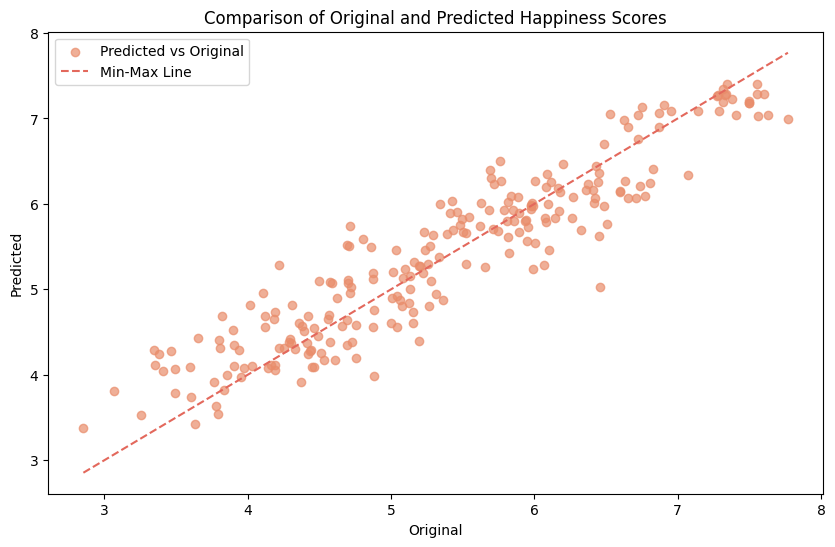

In [ ]:
sns.set_palette("flare")

plt.figure(figsize=(10, 6))

plt.scatter(y_original, y_predicted, label="Predicted vs Original", color=sns.color_palette()[0], alpha=0.7)

min_val = min(y_original.min(), y_predicted.min())
max_val = max(y_original.max(), y_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], color=sns.color_palette()[1], linestyle="--", label="Min-Max Line")

plt.xlabel("Original")
plt.ylabel("Predicted")
plt.title("Comparison of Original and Predicted Happiness Scores")
plt.legend()

plt.show()